# Casusopdracht - Films

**Klas:** V2B
**Studenten:** 
- Roan Gaasbeek
- Mathias Hendriks
- Luc Pikaar


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# 1. Business Understanding

## Doelstelling
Het doel van dit onderzoek is het vaststellen van de belangrijkste kenmerken (zoals budget
IMDb-scores, en sociale media populariteit) van films die goed presteren, om te begrijpen welke
factoren bijdragen aan succes in de filmindustrie.

## Onderzoeksvragen
De volgende onderzoeksvragen worden behandeld in deze opdracht:

1. In hoeverre is de bruto-omzet van een film te voorspellen op basis van de populariteit op **Facebook** en **IMDB**?
2. In hoeverre beïnvloedt het slagen voor de Bechdeltest de bruto-omzet van een film?
3. In hoeverre is het mogelijk om logische clusters te vinden o.b.v. onder andere budget en bruto-omzet? Denk aan blockbusters (hoog budget en hoge omzet), flops (hoog budget en lage omzet) of cultfilms (laag budget en hoge omzet). Je mag extra features toevoegen. 

# 2. Data understanding
De tweede fase in **CRISP-DM** is de **data understanding** dit houdt in:
- Data Collection
- Data Exploration & Analysis

## Data Collection

### Movies dataset
dit is de dataset die we uit deze opdracht hebben meegekregen

### Bechdeltest
De bechdel test is als volgt:
1. It has to have at least two (named) women in it
2. Who talk to each other
3. About something besides a man

https://bechdeltest.com/


In [2]:
dataset = pd.read_csv('movie.csv')
bechdel_dataset = pd.read_csv('bechdel.csv')

## Data Exploration & Analysis
In deze fase wordt de dataset grondig onderzocht om patronen, relaties en potentieel problematische gegevens te identificeren. Het doel van data exploration is om een eerste inzicht te krijgen in de structuur van de data, trends te ontdekken en belangrijke kenmerken te identificeren die verder onderzocht moeten worden.

### Algemene verkenning
Om een eerste indruk van de dataset te krijgen, maken we gebruik van de `head`-functie. Deze functie geeft een overzicht van de eerste paar rijen van de dataset, waardoor we snel inzicht krijgen in de structuur van de data.

In [3]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Om snel een overzicht te krijgen van alle kolommen en mogelijke features in de dataset, maken we gebruik van de `columns`-functie. Hiermee kunnen we eenvoudig de namen van de kolommen bekijken, wat nuttig is voor het bepalen van welke variabelen relevant zijn voor verdere analyse.

In [4]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Vervolgens gebruiken we de `dtypes`-functie om de datatypen van elke kolom in de dataset te achterhalen. Dit helpt ons te begrijpen welke soort gegevens in elke kolom aanwezig zijn

In [5]:
dataset.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

We gebruiken de `describe`-functie om een overzicht te krijgen van de belangrijkste statistieken van de numerieke kolommen in de dataset. Deze functie geeft ons inzicht in de gemiddelde waarden, de spreiding, en de extremen van de data, waardoor we beter begrijpen hoe de gegevens zijn verdeeld.

In [6]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Voor een samenvatting van de niet-numerieke gegevens specificeren we in de `describe`-functie dat we ook objecttypen willen opnemen door `include='object'` toe te voegen.

In [7]:
dataset.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5029,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,46,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


### Variabelen & Meetniveaus

In deze analyse zijn de volgende variabelen overwogen met hun verwachte impact op de bruto-omzet (gross):

- Director name & Actor names: De bekendheid van de regisseur en de hoofdrolspelers kan invloed hebben op de aantrekkingskracht van de film en daarmee de bruto-omzet.
- Facebook Likes: De sociale media populariteit van de regisseur en de acteurs kan de zichtbaarheid van de film vergroten en zo invloed op de bruto-omzet hebben.
- Budget: Een hoger budget kan leiden tot hogere bruto-omzet.
- IMDB score: Een hogere score op IMDB wijst vaak op betere filmkwaliteit en kan leiden tot meer kijkers en daarmee hogere bruto-omzet.


| Feature                 | Afhankelijk/Onafhankelijk | Meetniveau |
|:------------------------|:--------------------------|:-----------|
| Director Name           | Onafhankelijk             | Nominaal   |
| Actor 1 Name            | Onafhankelijk             | Nominaal   |
| Actor 2 Name            | Onafhankelijk             | Nominaal   |
| Actor 3 Name            | Onafhankelijk             | Nominaal   |
| Director Facebook Likes | Onafhankelijk             | Discreet   |
| Actor 1 Facebook Likes  | Onafhankelijk             | Discreet   |
| Actor 2 Facebook Likes  | Onafhankelijk             | Discreet   |
| Actor 3 Facebook Likes  | Onafhankelijk             | Discreet   |
| Movie Facebook Likes    | Onafhankelijk             | Discreet   |
| Budget                  | Onafhankelijk             | Continu    |
| IMDB Score              | Onafhankelijk             | Discreet   |
| Gross                   | Afhankelijk               | Continu    |

In [8]:
kolommen = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes','movie_facebook_likes', 'budget', 'imdb_score', 'gross']
data_analyse = dataset[kolommen]
data_analyse.head()


,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,budget,imdb_score,gross
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,0.0,1000.0,936.0,855.0,4834,33000,237000000.0,7.9,760505847.0
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,563.0,40000.0,5000.0,1000.0,48350,0,300000000.0,7.1,309404152.0
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,0.0,11000.0,393.0,161.0,11700,85000,245000000.0,6.8,200074175.0
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,22000.0,27000.0,23000.0,23000.0,106759,164000,250000000.0,8.5,448130642.0
4,Doug Walker,Doug Walker,Rob Walker,NaN,131.0,131.0,12.0,NaN,143,0,NaN,7.1,NaN


In [9]:
data_analyse.describe()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,budget,imdb_score,gross
count,4939.000000,5036.000000,5030.000000,5020.000000,5043.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,686.509212,6560.047061,1651.754473,645.009761,9699.063851,7525.964505,3.975262e+07,6.442138,4.846841e+07
std,2813.328607,15020.759120,4042.438863,1665.041728,18163.799124,19320.445110,2.061149e+08,1.125116,6.845299e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,7.000000,614.000000,281.000000,133.000000,1411.000000,0.000000,6.000000e+06,5.800000,5.340988e+06
50%,49.000000,988.000000,595.000000,371.500000,3090.000000,166.000000,2.000000e+07,6.600000,2.551750e+07
75%,194.500000,11000.000000,918.000000,636.000000,13756.500000,3000.000000,4.500000e+07,7.200000,6.230944e+07
max,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,1.221550e+10,9.500000,7.605058e+08


### Target
De targetvariabele in dit onderzoek is de Bruto-omzet `gross`. Deze variabele vertegenwoordigt de inkomsten van een film.

Om inzicht te krijgen in de verspreiding van de bruto-omzetwaarden, zullen er twee histogrammen worden gebruikt. De eerste is zonder limiet hierin is het mogelijk om ook de uitschieters te zien. De tweede is ingezoomd op de waarde tot max 100 Miljoen. Dit helpt om de verdeling van de omzet in de dataset te visualiseren en te identificeren of er sprake is van een normale verdeling, uitschieters of andere patronen die van invloed kunnen zijn op de analyses.

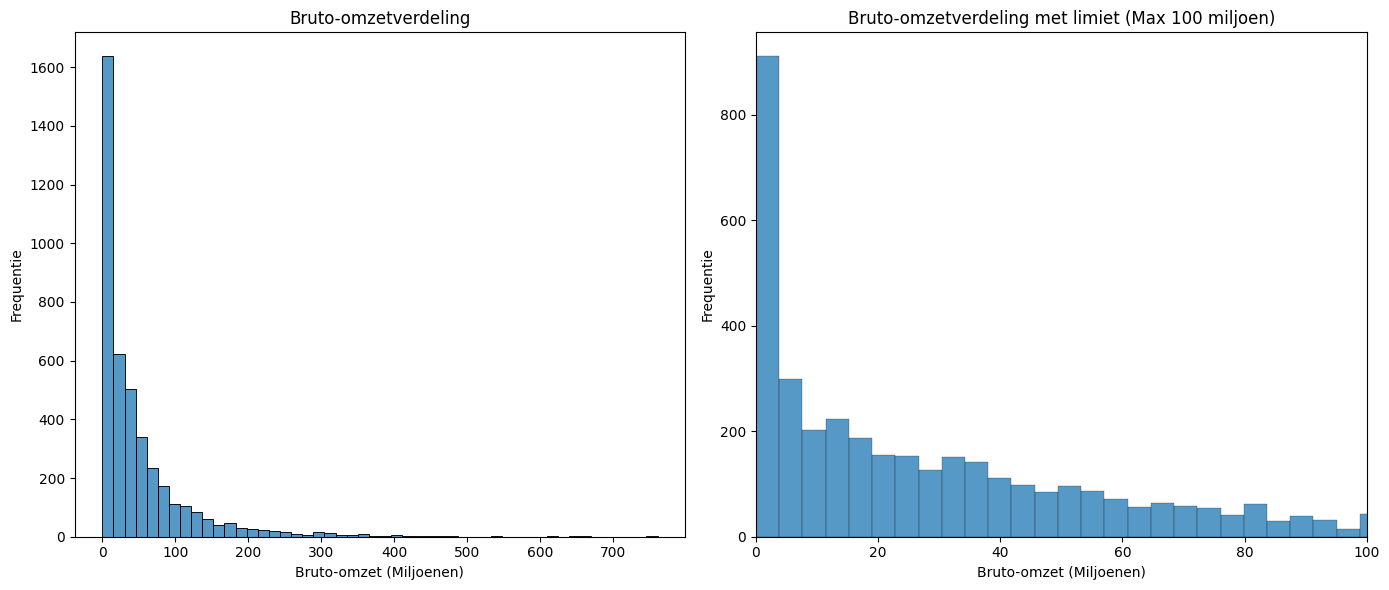

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
gross = data_analyse['gross'].dropna()
sns.histplot(gross / 10**6, bins=50, ax=axes[0])
axes[0].set_title('Bruto-omzetverdeling')
axes[0].set_xlabel('Bruto-omzet (Miljoenen)')
axes[0].set_ylabel('Frequentie')

sns.histplot(dataset['gross'] / 10**6, bins=200, ax=axes[1])
axes[1].set_title('Bruto-omzetverdeling met limiet (Max 100 miljoen)')
axes[1].set_xlabel('Bruto-omzet (Miljoenen)')
axes[1].set_ylabel('Frequentie')

# Zet de x-as limiet tot maximaal 200 miljoen
axes[1].set_xlim(0, 100)

plt.tight_layout()
plt.show()

Uit de histogrammen blijkt dat een groot deel van de `gross` waarden zich rond nul bevindt. Dit wijst mogelijk op een aanzienlijk aantal ontbrekende of ongeldige waarden in de dataset. Het kan zijn dat voor veel films de bruto-omzet ontbreekt. Dit zou de betrouwbaarheid van verdere analyses kunnen beïnvloeden.

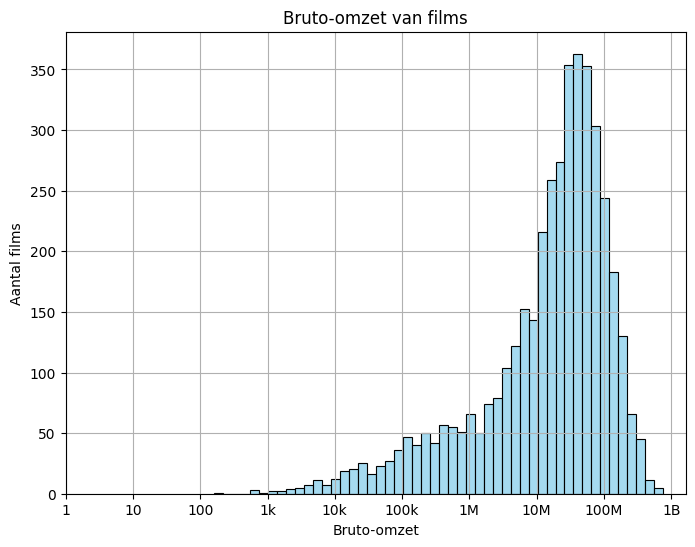

In [11]:
omzet = data_analyse['gross'].dropna()
omzet_log = np.log10(omzet + 1)

# Seaborn histogram plotten
plt.figure(figsize=(8, 6))
sns.histplot(omzet_log, bins=50, color='skyblue', edgecolor='black')

# Titel en labels toevoegen
plt.title('Bruto-omzet van films')
plt.xlabel('Bruto-omzet')
plt.ylabel('Aantal films')
plt.xticks(ticks=range(10), labels=["1","10","100","1k","10k","100k","1M", "10M", "100M", "1B"])

plt.grid(True)
plt.show()

Er is gekozen om een log10-transformatie toe te passen op de Bruot-omzet in plaats van een standaard histogram. Dit komt doordat er in de dataset veel films zijn met een bruto-omzet van 0 of zeer lage waarden. Door deze waarden op een lineaire schaal weer te geven, zouden de meeste films in een enkele categorie vallen, wat een "saaie" visualisatie oplevert met weinig inzicht in de spreiding van de hogere bruto-omzetten. De logaritmische schaal comprimeert de hoge uitschieters en spreidt de lagere waarden beter uit, waardoor de onderlinge verschillen beter zichtbaar worden en de visualisatie meer informatieve waarde krijgt.

### Features

#### Facebook likes
Om inzicht te krijgen in de populariteit van de verschillende actoren en de regisseur, hebben we de verdeling van de Facebook-likes per persoon afzonderlijk gevisualiseerd in de vorm van histogrammen. Deze grafieken tonen de frequentie van het aantal likes van de `director`, `acteur 1`, `acteur 2`, `acteur 3`, `cast_total` en de `movie`.

In [12]:
dataset['director_facebook_likes'].describe()

count     4939.000000
mean       686.509212
std       2813.328607
min          0.000000
25%          7.000000
50%         49.000000
75%        194.500000
max      23000.000000
Name: director_facebook_likes, dtype: float64

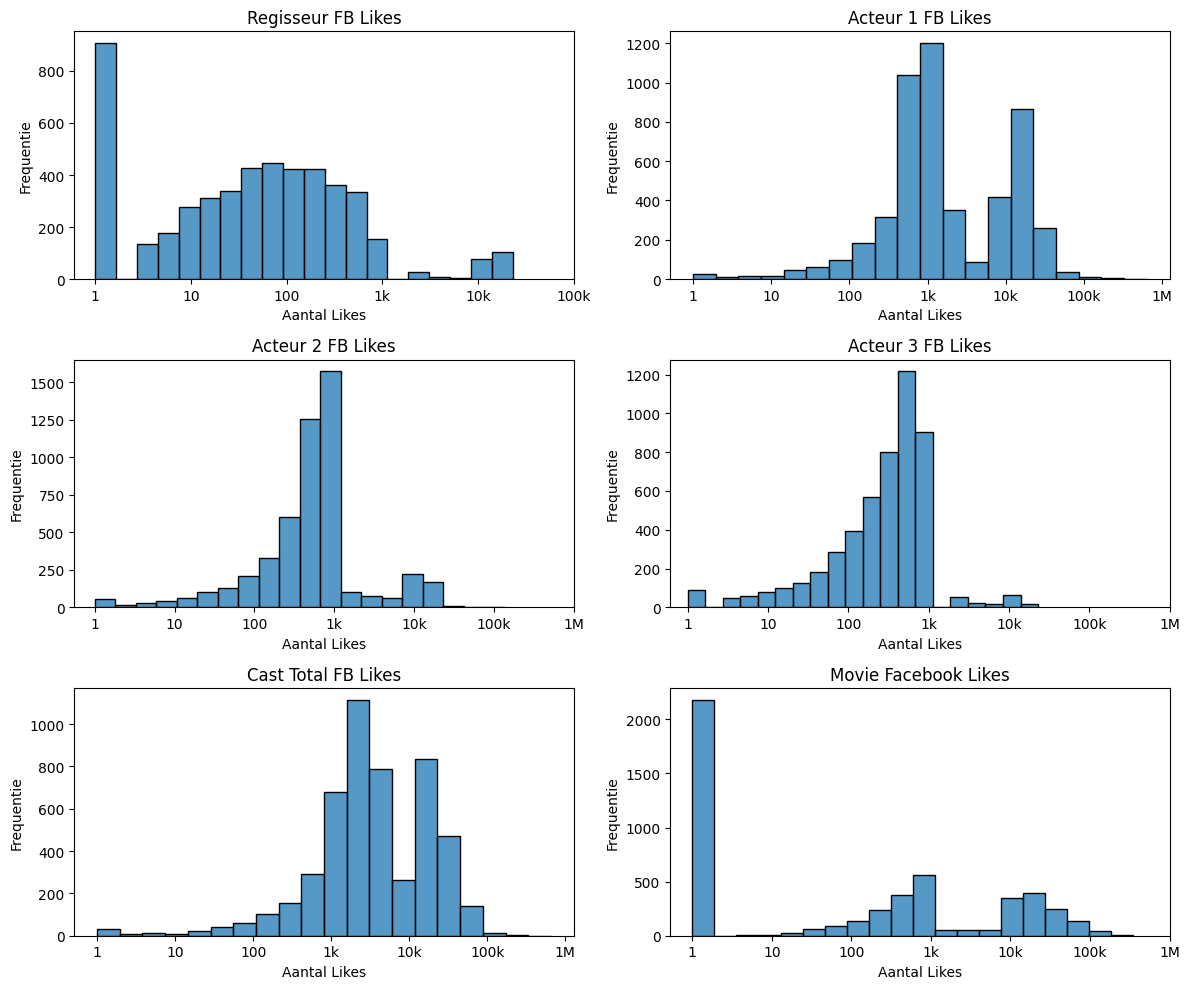

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Logaritmische transformatie van de 'director_facebook_likes' om uitschieters te comprimeren
director_likes = dataset['director_facebook_likes'].dropna()
director_likes_log = np.log10(director_likes + 1)
sns.histplot(director_likes_log, bins=20, kde=False, ax=axes[0, 0])

axes[0, 0].set_title('Regisseur FB Likes')
axes[0, 0].set_xlabel('Aantal Likes')
axes[0, 0].set_ylabel('Frequentie')
axes[0, 0].set_xticks([0, 1, 2, 3, 4, 5])
axes[0, 0].set_xticklabels(["1","10","100","1k","10k","100k"])

# Logaritmische transformatie van de 'actor_1_facebook_likes' om uitschieters te comprimeren
actor_1_likes = dataset['actor_1_facebook_likes'].dropna()
actor_1_likes_log = np.log10(actor_1_likes + 1)
sns.histplot(actor_1_likes_log, bins=20, kde=False, ax=axes[0, 1])

axes[0, 1].set_title('Acteur 1 FB Likes')
axes[0, 1].set_xlabel('Aantal Likes')
axes[0, 1].set_ylabel('Frequentie')
axes[0, 1].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[0, 1].set_xticklabels(["1","10","100","1k","10k","100k","1M"])

# Logaritmische transformatie van de 'actor_2_facebook_likes' om uitschieters te comprimeren
actor_2_likes = dataset['actor_2_facebook_likes'].dropna()
actor_2_likes_log = np.log10(actor_2_likes + 1)
sns.histplot(actor_2_likes_log, bins=20, kde=False, ax=axes[1, 0])

axes[1, 0].set_title('Acteur 2 FB Likes')
axes[1, 0].set_xlabel('Aantal Likes')
axes[1, 0].set_ylabel('Frequentie')
axes[1, 0].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[1, 0].set_xticklabels(["1","10","100","1k","10k","100k","1M"])

# Logaritmische transformatie van de 'actor_3_facebook_likes' om uitschieters te comprimeren
actor_3_likes = dataset['actor_3_facebook_likes'].dropna()
actor_3_likes_log = np.log10(actor_3_likes + 1)
sns.histplot(actor_3_likes_log, bins=20, kde=False, ax=axes[1, 1])

axes[1, 1].set_title('Acteur 3 FB Likes')
axes[1, 1].set_xlabel('Aantal Likes')
axes[1, 1].set_ylabel('Frequentie')
axes[1, 1].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[1, 1].set_xticklabels(["1","10","100","1k","10k","100k","1M"])

# Logaritmische transformatie van de 'cast_total_facebook_likes' om uitschieters te comprimeren
cast_total_likes = dataset['cast_total_facebook_likes'].dropna()
cast_total_likes_log = np.log10(cast_total_likes + 1)
sns.histplot(cast_total_likes_log, bins=20, kde=False, ax=axes[2, 0])

axes[2, 0].set_title('Cast Total FB Likes')
axes[2, 0].set_xlabel('Aantal Likes')
axes[2, 0].set_ylabel('Frequentie')
axes[2, 0].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[2, 0].set_xticklabels(["1", "10", "100", "1k", "10k", "100k", "1M"])

# Logaritmische transformatie van de 'movie_facebook_likes' om uitschieters te comprimeren
movie_likes = dataset['movie_facebook_likes'].dropna()
movie_likes_log = np.log10(movie_likes + 1)
sns.histplot(movie_likes_log, bins=20, kde=False, ax=axes[2, 1])

axes[2, 1].set_title('Movie Facebook Likes')
axes[2, 1].set_xlabel('Aantal Likes')
axes[2, 1].set_ylabel('Frequentie')
axes[2, 1].set_xticks([0, 1, 2, 3, 4, 5, 6])
axes[2, 1].set_xticklabels(["1", "10", "100", "1k", "10k", "100k", "1M"])

plt.tight_layout()
plt.show()

#### IMDB-Score

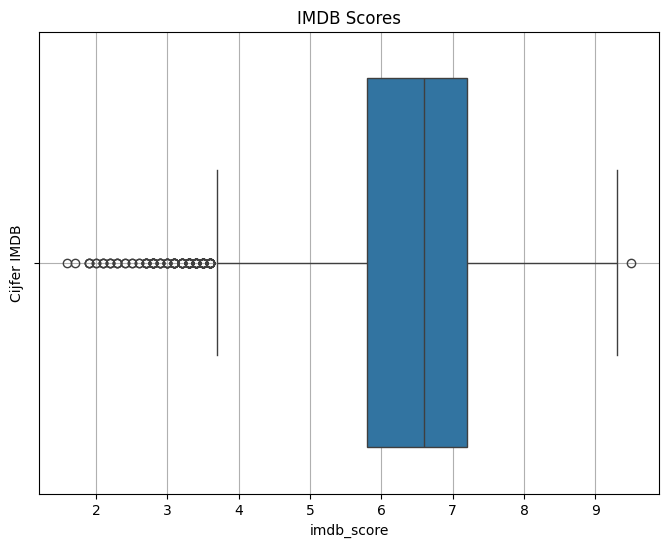

In [14]:
# Veronderstel dat de dataset al geladen is en IMDb-scores bevat
imdb_scores = data_analyse['imdb_score'].dropna()

# Maak een boxplot voor de IMDb-scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=imdb_scores)

# Instellen van de titel en labels
plt.title('IMDB Scores')
plt.ylabel('Cijfer IMDB')

# Weergeven van de plot
plt.grid(True)
plt.show()


#### Budget

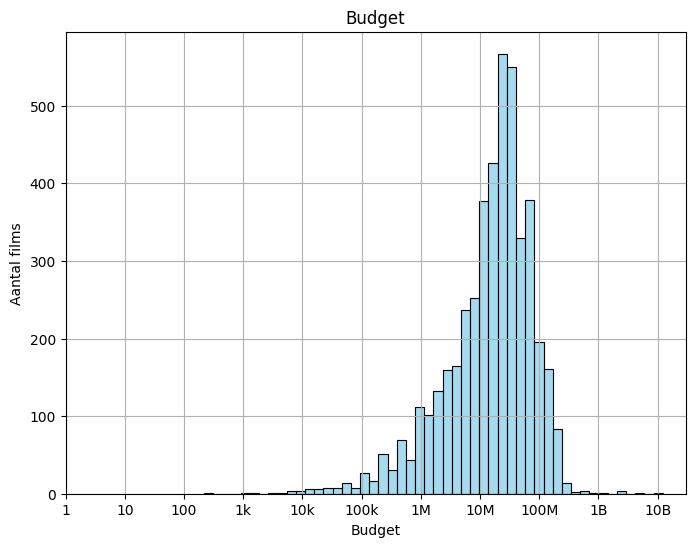

In [15]:
budget = data_analyse['budget'].dropna()
budget_log = np.log10(budget + 1)

# Seaborn histogram plotten
plt.figure(figsize=(8, 6))
sns.histplot(budget_log, bins=50, color='skyblue', edgecolor='black')

# Titel en labels toevoegen
plt.title('Budget')
plt.xlabel('Budget')
plt.ylabel('Aantal films')
plt.xticks(ticks=range(11), labels=["1","10","100","1k","10k","100k","1M", "10M", "100M", "1B", "10B"])

plt.grid(True)
plt.show()

## Data Kwaliteit

### Missende Waarden
Met de functie `isnull` kunnen we controleren hoeveel missende waarden we hebben. Hier voegen we nog een check aan toe om te kijken hoevel waarden 0 zijn

In [16]:
(data_analyse.isnull() | (data_analyse == 0)).sum()


director_name                 104
actor_1_name                    7
actor_2_name                   13
actor_3_name                   23
director_facebook_likes      1011
actor_1_facebook_likes         33
actor_2_facebook_likes         68
actor_3_facebook_likes        112
cast_total_facebook_likes      33
movie_facebook_likes         2181
budget                        492
imdb_score                      0
gross                         884
dtype: int64

### Duplicate data
Met de functie `duplicated` checken we of er duplicates in de data zijn. Dit checken we door de waarde van kolommen `movie_title` en `movie_imdb_link` mee te geven aangezien dit eigenlijk de unieke waarden zouden moeten zijn.

In [17]:
dataset[dataset.duplicated(['movie_title', 'movie_imdb_link'])]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,Color,Paul Schrader,130.0,93.0,261.0,697.0,Ruby Dee,783.0,NaN,Fantasy|Horror|Thriller,...,106.0,English,USA,R,18000000.0,1982.0,782.0,6.1,1.85,0
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4951,Black and White,George A. Romero,284.0,96.0,0.0,56.0,Duane Jones,125.0,NaN,Drama|Horror|Mystery,...,580.0,English,USA,Unrated,114000.0,1968.0,108.0,8.0,1.85,0
4971,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,...,279.0,English,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0


### Uitschieters

In [18]:
for kolom in ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'budget', 'gross']:

    # Q1, Q3 en IQR bepalen
    q1 = data_analyse[kolom].quantile(0.25)
    q3 = data_analyse[kolom].quantile(0.75)
    iqr = q3 - q1

    # Limieten uitschieters berekenen
    klein_laag = q1 - 1.5 * iqr
    klein_hoog = q3 + 1.5 * iqr
    extreem_laag = q1 - 3 * iqr
    extreem_hoog = q3 + 3 * iqr

    # Kleine uitschieters (1.5 - 3 IQR)
    kleine_uitschieters = data_analyse[kolom][((data_analyse[kolom] < klein_laag) & (data_analyse[kolom] > extreem_laag)) | ((data_analyse[kolom] > klein_hoog) & (data_analyse[kolom] < extreem_hoog))]
    print(f"{kolom.title()} Kleine uitschieters: {kleine_uitschieters.count()}")
 
    # Extreme uitschieters (3+ IQR)
    extreme_uitschieters = data_analyse[kolom][(data_analyse[kolom] < extreem_laag) | (data_analyse[kolom] > extreem_hoog)]
    print(f"{kolom.title()} Extreme uitschieters: {extreme_uitschieters.count()}")

Director_Facebook_Likes Kleine uitschieters: 268
Director_Facebook_Likes Extreme uitschieters: 333
Actor_1_Facebook_Likes Kleine uitschieters: 118
Actor_1_Facebook_Likes Extreme uitschieters: 52
Actor_2_Facebook_Likes Kleine uitschieters: 100
Actor_2_Facebook_Likes Extreme uitschieters: 538
Actor_3_Facebook_Likes Kleine uitschieters: 27
Actor_3_Facebook_Likes Extreme uitschieters: 146
Cast_Total_Facebook_Likes Kleine uitschieters: 244
Cast_Total_Facebook_Likes Extreme uitschieters: 110
Movie_Facebook_Likes Kleine uitschieters: 181
Movie_Facebook_Likes Extreme uitschieters: 930
Budget Kleine uitschieters: 200
Budget Extreme uitschieters: 118
Gross Kleine uitschieters: 187
Gross Extreme uitschieters: 119


## Waarnemingen

- movie_facebook_likes heeft 930 extreme uitschieters, dat is behoorlijk veel. Zoals eerder benoemd, komt dit waarschijnlijk doordat er veel films zijn zonder facebook pagina, wat geregistreerd wordt als 0 likes.

- imdb_score heeft 0 extreme uitschieters. Dit lijkt ons logisch omdat de imdb score voor een film altijd tussen de 1 en 10 ligt. Er zal dus nooit een waarde van bijvoorbeeld 100 moeten zijn, wat een extreme uitschieter zou zijn.

- De kolommen movie_facebook_likes en imdb_score hebben beide 5043 waarden, maar budget en gross hebben minder waarden (4551 en 4159 waarden).  
We zullen hier een oplossing voor moeten vinden, door bijvoorbeeld de rijen met missende waarden te droppen van de dataset.

- Q1 voor movie_facebook_likes is 0, dit betekent dat ten minste 25% van de films 0 facebook likes hebben. Dit komt waarschijnlijk omdat deze films geen facebook-pagina hebben.

# 3. Data preparation


## Data Cleaning

In [19]:
#We hebben de link voor de imdb pagina niet nodig maar hierin staat wel de imdb_id die we later kunnen gebruiken om een externe dataset te koppelen.

dataset['movie_imdb_link'] = dataset['movie_imdb_link'].str.slice(start=28, stop=-17)

In [20]:
#Veranderen van een paar column namen
dataset.rename(columns={'director_name':'director', 'director_facebook_likes':'director_likes', 'actor_1_name':'actor_1', 'actor_1_facebook_likes':'actor_1_likes', 'actor_2_name':'actor_2', 'actor_2_facebook_likes':'actor_2_likes', 'actor_3_name':'actor_3', 'actor_3_facebook_likes':'actor_3_likes', 'cast_total_facebook_likes':'cast_total_likes', 'movie_facebook_likes':'movie_likes', 'movie_title':'title', 'movie_imdb_link':'imdb_id'}, inplace=True)

### Drop NaN

In [21]:
dataset.dropna(subset=['gross'], inplace=True)

### Drop Duplicates 

In [22]:
# Controleert het aantal duplicates in de dataset.
totaal_duplicates = dataset.duplicated(['title']).sum()
print(f"Aantal duplicates in de dataset: {totaal_duplicates}")
dataset = dataset.drop_duplicates(['title'])

Aantal duplicates in de dataset: 104


In [23]:
## Valuta naar USD voor gross
landen = dataset['country'].dropna().unique()

## Lijst land naar valuta en valuta naar USD
land_naar_valuta = {
    'USA': 'USD',
    'UK': 'GBP',
    'New Zealand': 'NZD',
    'Canada': 'CAD',
    'Australia': 'AUD',
    'Belgium': 'EUR',
    'Japan': 'JPY',
    'Germany': 'EUR',
    'China': 'CNY',
    'France': 'EUR',
    'Mexico': 'MXN',
    'Spain': 'EUR',
    'Hong Kong': 'HKD',
    'Czech Republic': 'CZK',
    'India': 'INR',
    'South Korea': 'KRW',
    'Peru': 'PEN',
    'Italy': 'EUR',
    'Russia': 'RUB',
    'Denmark': 'DKK',
    'Ireland': 'EUR',
    'South Africa': 'ZAR',
    'Iceland': 'ISK',
    'Switzerland': 'CHF',
    'Romania': 'RON',
    'Netherlands': 'EUR',
    'Hungary': 'HUF',
    'Greece': 'EUR',
    'Sweden': 'SEK',
    'Norway': 'NOK',
    'Taiwan': 'TWD',
    'Cambodia': 'KHR',
    'Thailand': 'THB',
    'Slovakia': 'EUR',
    'Bulgaria': 'BGN',
    'Iran': 'IRR',
    'Poland': 'PLN',
    'Turkey': 'TRY',
    'Nigeria': 'NGN',
    'Brazil': 'BRL',
    'Finland': 'EUR',
    'Bahamas': 'BSD',
    'Argentina': 'ARS',
    'Colombia': 'COP',
    'Israel': 'ILS',
    'Egypt': 'EGP',
    'Indonesia': 'IDR',
    'Pakistan': 'PKR',
    'Slovenia': 'EUR',
    'Dominican Republic': 'DOP',
    'United Arab Emirates': 'AED',
    'Kenya': 'KES',
    'Philippines': 'PHP',
    'Libya': 'LYD',
}

#Koers gebruikt van xe.com (27-09-2024)
valuta_naar_usd = {
    'USD': 1,
    'GBP': 1.33,
    'NZD': 0.63,
    'CAD': 0.74,
    'AUD': 0.68,
    'EUR': 1.11,
    'JPY': 0.0069,
    'CNY': 0.14,
    'MXN': 0.05,
    'HKD': 0.13,
    'CZK': 0.044,
    'INR': 0.012,
    'KRW': 0.000076,
    'PEN': 0.268,
    'RUB': 0.0107,
    'DKK': 0.15,
    'ZAR': 0.058,
    'ISK': 0.0074,
    'CHF': 1.184,
    'RON': 0.224,
    'HUF': 0.0028,
    'SEK': 0.0987,
    'NOK': 0.0948,
    'TWD': 0.0317,
    'KHR': 0.000245,
    'THB': 0.030,
    'BGN': 0.57,
    'IRR': 0.000023738816,
    'PLN': 0.26,
    'TRY': 0.029,
    'NGN': 0.00060493026,
    'BRL': 0.183,
    'BSD': 1,
    'ARS': 0.010,
    'COP': 0.00023999137,
    'ILS': 0.27,
    'EGP': 0.0206,
    'IDR': 0.000066187407,
    'PKR': 0.0036020965,
    'DOP': 0.0166,
    'AED': 0.27,
    'KES': 0.0077,
    'PHP': 0.017,
    'LYD': 0.209,
}


### Valuta naar USD voor gross


In [24]:
dataset['gross'] = dataset.apply(
    lambda row: row['gross'] * valuta_naar_usd.get(land_naar_valuta.get(row['country'], 'USD'), 1),
    axis=1
)

### Valuta naar USD voor budget



In [25]:
dataset['budget'] = dataset.apply(
    lambda row: row['budget'] * valuta_naar_usd.get(land_naar_valuta.get(row['country'], 'USD'), 1),
    axis=1
)
dataset[['title', 'country', 'budget', 'gross']].head(10)

,title,country,budget,gross
0,Avatar,USA,237000000.0,7.605058e+08
1,Pirates of the Caribbean: At World's End,USA,300000000.0,3.094042e+08
2,Spectre,UK,325850000.0,2.660987e+08
3,The Dark Knight Rises,USA,250000000.0,4.481306e+08
5,John Carter,USA,263700000.0,7.305868e+07
6,Spider-Man 3,USA,258000000.0,3.365303e+08
7,Tangled,USA,260000000.0,2.008073e+08
8,Avengers: Age of Ultron,USA,250000000.0,4.589916e+08
9,Harry Potter and the Half-Blood Prince,UK,332500000.0,4.016028e+08
10,Batman v Superman: Dawn of Justice,USA,250000000.0,3.302491e+08


In [26]:
dataset.drop(['color', 'duration', 'aspect_ratio', 'genres', 'num_voted_users', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'num_critic_for_reviews', 'content_rating', 'title_year', 'language'], axis = 1, inplace=True)

dataset = dataset[['title', 'director', 'actor_1', 'actor_2', 'actor_3', 'director_likes', 'actor_1_likes', 'actor_2_likes', 'actor_3_likes', 'cast_total_likes','movie_likes', 'budget', 'imdb_score', 'gross']]


In [27]:
dataset

,title,director,actor_1,actor_2,actor_3,director_likes,actor_1_likes,actor_2_likes,actor_3_likes,cast_total_likes,movie_likes,budget,imdb_score,gross
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,0.0,1000.0,936.0,855.0,4834,33000,237000000.0,7.9,7.605058e+08
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,563.0,40000.0,5000.0,1000.0,48350,0,300000000.0,7.1,3.094042e+08
2,Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,0.0,11000.0,393.0,161.0,11700,85000,325850000.0,6.8,2.660987e+08
3,The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,22000.0,27000.0,23000.0,23000.0,106759,164000,250000000.0,8.5,4.481306e+08
5,John Carter,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,475.0,640.0,632.0,530.0,1873,24000,263700000.0,6.6,7.305868e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Cavite,Neill Dela Llana,Ian Gamazon,Edgar Tancangco,Quynn Ton,0.0,0.0,0.0,0.0,0,74,119.0,6.3,1.191207e+03
5035,El Mariachi,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0.0,121.0,20.0,6.0,147,0,7000.0,6.9,2.040920e+06
5037,Newlyweds,Edward Burns,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,0.0,296.0,205.0,133.0,690,413,9000.0,6.4,4.584000e+03
5041,Shanghai Calling,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,0.0,946.0,719.0,489.0,2386,660,NaN,6.3,1.044300e+04


## Correlation Analysis

### Facebook Likes

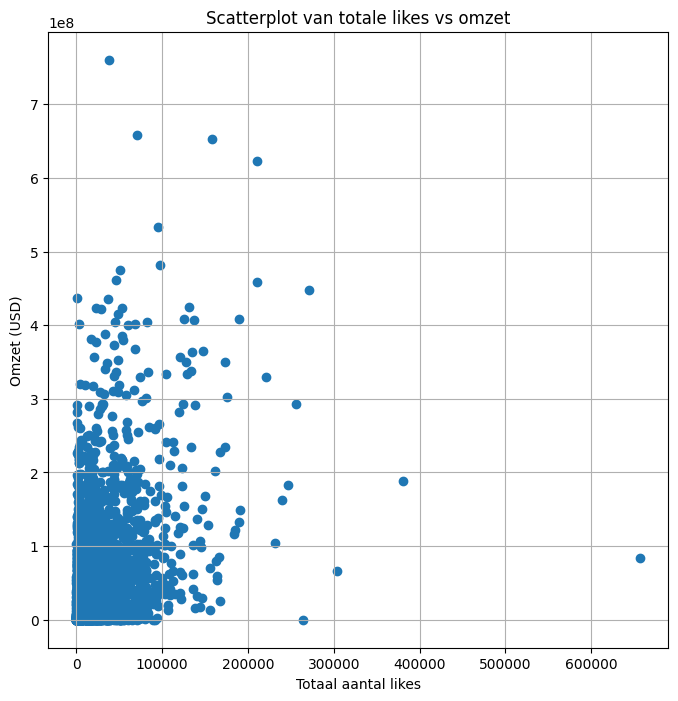

De correlatie is 0.39004319462044695


In [28]:
dataset['total_likes'] = dataset['cast_total_likes'] + dataset['movie_likes']
plt.figure(figsize=(8, 8))
plt.scatter(dataset['total_likes'], dataset['gross'])
plt.title('Scatterplot van totale likes vs omzet')
plt.xlabel('Totaal aantal likes')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()
correlatie = np.corrcoef(dataset['total_likes'], dataset['gross'])[0,1]
print(f"De correlatie is {correlatie}")

### budget


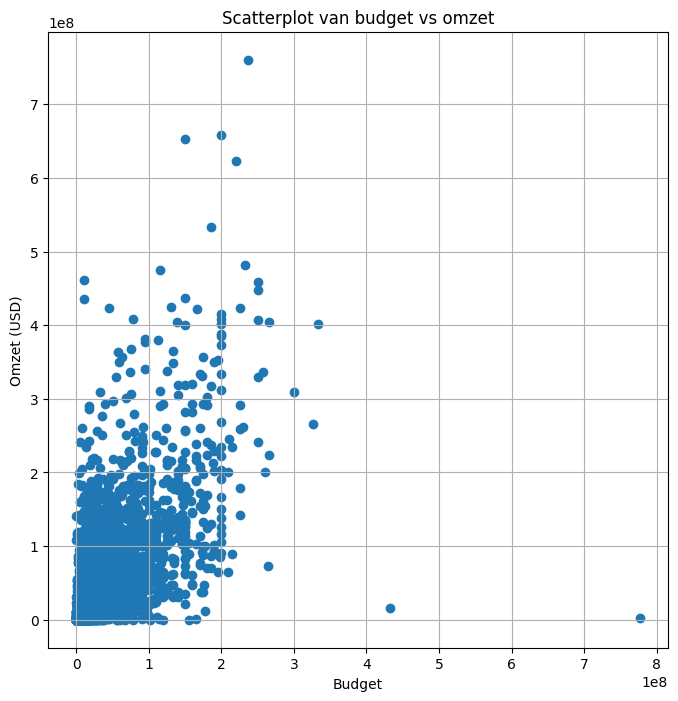

De correlatie is nan


In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(dataset['budget'], dataset['gross'])
plt.title('Scatterplot van budget vs omzet')
plt.xlabel('Budget')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()
correlatie = np.corrcoef(dataset['budget'], dataset['gross'])[0,1]
print(f"De correlatie is {correlatie}")

### IMDB Score

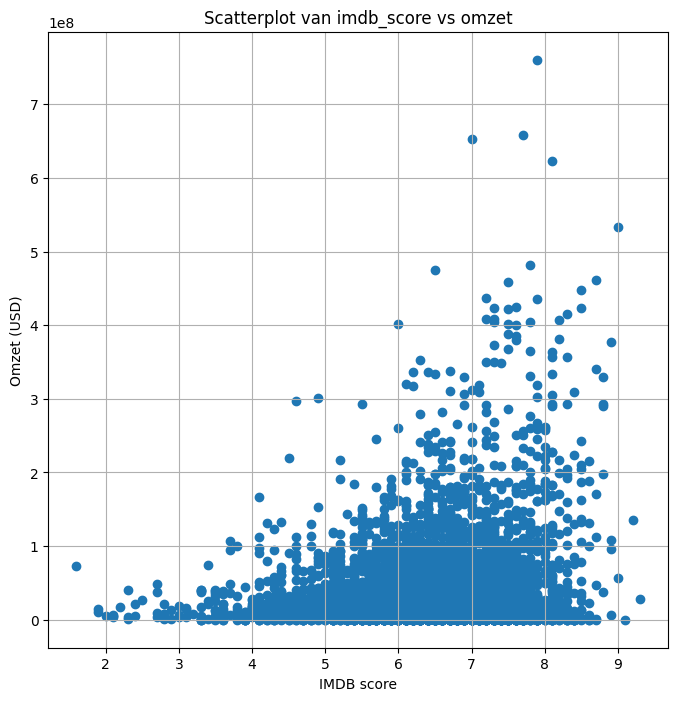

De correlatie is 0.20130933960257943


In [30]:
plt.figure(figsize=(8, 8))
plt.scatter(dataset['imdb_score'], dataset['gross'])
plt.title('Scatterplot van imdb_score vs omzet')
plt.xlabel('IMDB score')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()
correlatie = np.corrcoef(dataset['imdb_score'], dataset['gross'])[0,1]
print(f"De correlatie is {correlatie}")